In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact
from IPython.display import display
from sympy import solve, diff, symbols, Matrix, Symbol
import sympy.core.numbers as spn
from scipy.optimize import fsolve
from typing import List, Union, Tuple
import time

# interactive plots
%matplotlib widget

<h1> 6 A neurological mode </h1>
<h2> 6.1 Experimenting with the FHN model </h2>

In [80]:
def euler_int(start, f, dt, steps, I_ext, *args, pulse=False, **kwargs):
    eul = np.zeros((steps, len(start)))
    eul[0] = start
    for i in range(steps-1):
        eul[i+1] = eul[i] + dt*f(*eul[i], I_ext, pulse, i, *args, **kwargs)
        
    return eul.T # return the transposed array so we can use X, Y, Z = euler_int( ... )

In [81]:
def calc_I_ext(n, I_ext, pulse):
    if pulse:
        return I_ext if n in range(100, 111) else 0
    return I_ext


def FHN_model(V, w, I_ext, pulse, n, a=0.1, e=0.01, gamma=1):
    def V_Prime(V, w, a, e, gamma, I_ext):
        return (1 / e)*(-w + V*(1 - V)*(V - a) + calc_I_ext(n, I_ext, pulse))
    
    def w_Prime(V, w, gamma):
        return V - gamma*w
    
    return np.array([V_Prime(V, w, a, e, gamma, I_ext), w_Prime(V, w, gamma)])

In [82]:
def plot_neuron(ax1, n_steps, I_ext: Tuple[int, int], pulse, title):
    x1, _ = euler_int((0, 0), FHN_model, 0.01, n_steps, I_ext[0], pulse=pulse)
    x2, _ = euler_int((0, 0), FHN_model, 0.01, n_steps, I_ext[1], pulse=pulse)
    t = np.array(range(len(x1)))
    
    # plot the time series
    ax1.plot(t, x1, c='blue', label='$I_{ext} = 0.01$')
    ax1.plot(t, x2, c='red', label='$I_{ext} = 0.03$')
    ax1.legend(loc='upper left')
    ax1.set_xlabel('t'), ax.set_ylabel('V')
    ax1.set_title(title)

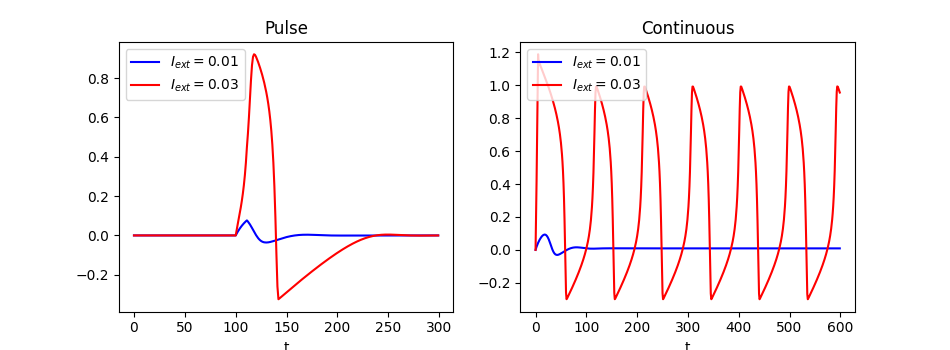

In [88]:
f1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 3.5))
plot_neuron(axes1[0], 300, (0.01, 0.03), True, title='Pulse')
plot_neuron(axes1[1], 600, (0.01, 0.2), False, title='Continuous')
plt.show()
f1.tight_layout()

<h2> 6.2 Two coupled neurons </h2>

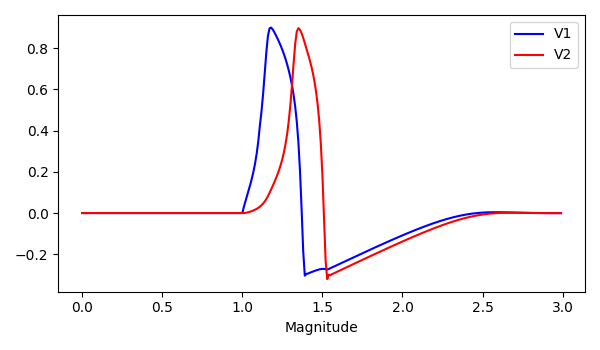

In [102]:
def I_coupling(V1, V2, R):
    return (V1 - V2) / R


def coupling(V1, w1, V2, w2, I_ext, pulse, n, R=45, a=0.1, e=0.01, gamma=1):
    def V1_Prime(V1, V2, w1, a, e, gamma, I_ext):
        I_21 = I_coupling(V2, V1, R)
        return (1 / e)*(-w1 + V1*(1 - V1)*(V1 - a) + calc_I_ext(n, I_ext, pulse) + I_21)
    
    def w1_Prime(V1, w1, gamma):
        return V1 - gamma*w1
    
    def V2_Prime(V1, V2, w2, a, e, gamma):
        I_12 = I_coupling(V1, V2, R)
        return (1 / e)*(-w2 + V2*(1 - V2)*(V2 - a) + I_12)
    
    def w2_Prime(V2, w2, gamma):
        return V2 - gamma*w2
    
    return np.array([V1_Prime(V1, V2, w1, a, e, gamma, I_ext),
                     w1_Prime(V1, w1, gamma),
                     V2_Prime(V1, V2, w2, a, e, gamma),
                     w2_Prime(V2, w2, gamma)])


def plot_neuron_c(ax, n_steps, dt, I_ext, pulse):
    x1, _, x2, _ = euler_int((0, 0, 0, 0), coupling, dt, n_steps, I_ext=I_ext, pulse=pulse, gamma=0.5, e=0.008)
    t = np.array(range(len(x1))) / 100
    
    # plot the time series
    ax.plot(t, x1, c='blue', label='V1')
    ax.plot(t, x2, c='red', label='V2')
    ax.legend()
    

f2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
plot_neuron_c(ax2, 300, 0.01, 0.025, True)
ax2.set_xlabel('t')
ax2.set_xlabel('Magnitude')
f2.tight_layout()
plt.show()

<h2> 6.3 Dynamics of the FHN model </h2>

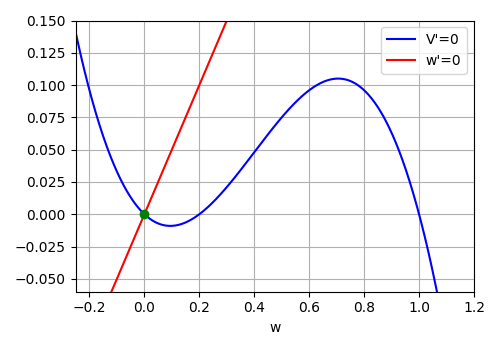

In [115]:
def roots(V, a=0.2, gamma=2):
    def root1(V, a):
        return V*(1-V)*(V-a)
    
    def root2(V, gamma):
        return V / gamma
    
    return np.array([root1(V, a), root2(V, gamma)])


V_ = np.linspace(-0.3, 1.2, 1000)
w1, w2 = roots(V_)
f3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5))
ax3.plot(V_, w1, label="V'=0", color='blue')
ax3.plot(V_, w2, label="w'=0", color='red')
ax3.plot(0, 0, marker='o', color='green')
ax3.set_xlabel('V')
ax3.set_xlabel('w')
ax3.set_xlim(-0.25,1.2)
ax3.set_ylim(-0.06,0.15)
ax3.legend()
ax3.grid()
f3.tight_layout()
plt.show()

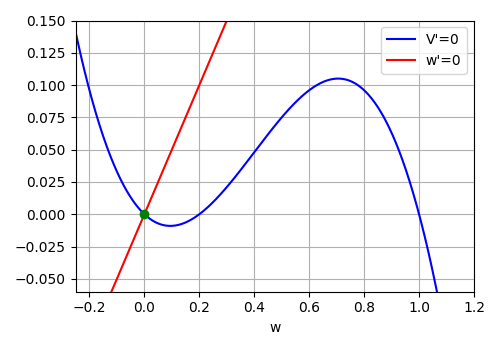

In [114]:

arrow_pos = [(0, 0.1), (0, -0.2), (0.4, 0.1), (0.6, -0.25)]
plot_nullcline_arrows(coord_l, func_1, func_2)



In [121]:
a=0.2
e=0.01
gamma=2

def dV(V, w, Iext):
    return (1/e)*(-w+(V*(1-V)*(V-a))+Iext)


def dw(V, w, Iext):
    return V-(gamma*w)


def equations(p):
    Iext=0.2
    V, w = p
    return (dV(V, w, Iext), dw(V, w, Iext))

eq1 = fsolve(equations, (0, 0))


print("Het evenwichtspunten van dit systeem wordt gegeven door",eq1,".")

Het evenwichtspunten van dit systeem wordt gegeven door [0.58798567 0.29399283] .


In [117]:
def plot_nullcline_arrows(coord_l, func_1, func_2):
    label = True
    for x, y in coord_l:
        # calculate the change for R and C
        delta_R = func_1(x, y)
        delta_C = func_2(x, y)
        
        # normalize the arrow lengths
        N = np.hypot(delta_R, delta_C)
        delta_R = delta_R / N
        delta_C = delta_C / N
        
        plt.arrow(x, y, delta_R, 0, color='red', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in R direction' if label else None)
        
        plt.arrow(x, y, 0, delta_C, color='blue', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in C direction' if label else None)
        
        plt.arrow(x, y, delta_R, delta_C, color='black', head_width=0.1, width=0.02, length_includes_head=True,
                 label='Arrow in R and C direction' if label else None)
        
        label = False